# Introduction

The Millennium Development Goals were a set of 8 goals for 2015 that were defined by the United Nations to help improve living conditions and the conditions of our planet. While looking at the key indicators from Goal 7: Ensure environmental sustainability, namely carbon dioxide (CO2) emissions, protected land and sea areas, and forests, the data will be processed and analysed. The analysis will help determine the strength, signficance and distribution of the data set. From the findings, a conclusion will be made for the investigation.

# Data Processing


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import sem
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('../data/MDG_Export.csv')

In [3]:
pd.set_option('display.max_colwidth', 100)

In [4]:
years = []
for col in data.columns:
    if '199' in col or '200' in col or '201' in col:
        data[col] = pd.to_numeric(data[col], errors='coerce')
        years.append(col)

In [5]:
data.interpolate(method='linear', limit_direction='both', inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 95 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CountryCode   690 non-null    int64  
 1   Country       690 non-null    object 
 2   SeriesCode    690 non-null    int64  
 3   MDG           690 non-null    object 
 4   Series        690 non-null    object 
 5   1990          690 non-null    float64
 6   Footnotes     67 non-null     object 
 7   Type          690 non-null    object 
 8   1991          690 non-null    float64
 9   Footnotes.1   508 non-null    object 
 10  Type.1        690 non-null    object 
 11  1992          690 non-null    float64
 12  Footnotes.2   486 non-null    object 
 13  Type.2        690 non-null    object 
 14  1993          690 non-null    float64
 15  Footnotes.3   486 non-null    object 
 16  Type.3        690 non-null    object 
 17  1994          690 non-null    float64
 18  Footnotes.4   485 non-null    

calculating the number of countries represented and missing_values, of which are by year

230 countries represented. There were missing values in the 2012, 2013 and 2015 to 2019 columns, 690 in each column, a total of 4830.

# Exploratory Data Analysis

Finding the top and bottom 5 countries by CO2 emissons of years 1990 and 2011

In [7]:
top_5_1990 = data.groupby(['Country']).apply(lambda x: x[x['Series'].str.contains('CO')]['1990']).nlargest(5)
bottom_5_1990 = data.groupby(['Country']).apply(lambda x: x[x['Series'].str.contains('CO')]['1990']).nsmallest(5)
top_5_2011 = data.groupby(['Country']).apply(lambda x: x[x['Series'].str.contains('CO')]['2011']).nlargest(5)
bottom_5_2011 = data.groupby(['Country']).apply(lambda x: x[x['Series'].str.contains('CO')]['2011']).nsmallest(5)

print(f'Top 5 countries in 1990: \n{top_5_1990}\n')
print(f'Bottom 5 countries in 1990: \n{bottom_5_1990}\n')
print(f'Top 5 countries in 2011: \n{top_5_2011}\n')
print(f'Bottom 5 countries in 2011: \n{bottom_5_2011}\n')

Top 5 countries in 1990: 
Country            
United States   652    4823557.1
China           124    2460744.0
Japan           301    1094287.8
India           277     690576.8
United Kingdom  646     555902.5
Name: 1990, dtype: float64

Bottom 5 countries in 1990: 
Country                
Yemen               679   -2999.60
San Marino          523       0.00
Tokelau             613       0.00
Monaco              394       0.12
State of Palestine  574       0.75
Name: 1990, dtype: float64

Top 5 countries in 2011: 
Country                          
China                         124    9019518.2
United States                 652    5305569.6
United States Virgin Islands  655    2656671.8
India                         277    2074344.9
Russian Federation            499    1808073.0
Name: 2011, dtype: float64

Bottom 5 countries in 2011: 
Country                       
Niue                       445    11.0
Saint Helena               505    11.0
Wallis and Futuna Islands  673    25.7
Liech

In the top 5 emissions in 1990, the United States moved from first to second place in 2011, overtaken by China whom were second in 1990, as well as India, staying in fourth. The rest of the countries dropped from each of their respective lists and new ones took those places.

Calculating the mean and median CO2 emissions for 1990

In [8]:
mean_CO_1990 = data['1990'].loc[data['Series'].str.contains('CO')].mean()
median_CO_1990 = data['1990'].loc[data['Series'].str.contains('CO')].median()
print(f"Mean: {mean_CO_1990}\nMedian: {median_CO_1990}")

Mean: 71652.58585507244
Median: 1164.25


I think they differ, by so much, because the data to the right of the median is significantly higher, may be even going into extreme outliers.

Calculating min, max, and iqr CO2 emissions for 1990

In [9]:
iqr_CO_1990 = data['1990'].loc[data['Series'].str.contains('CO')].describe()
print(f'The min, max and iqr C02 emission for 1990 are: \n{iqr_CO_1990}\n')

The min, max and iqr C02 emission for 1990 are: 
count    2.300000e+02
mean     7.165259e+04
std      3.713642e+05
min     -2.999600e+03
25%      4.672500e+01
50%      1.164250e+03
75%      2.134833e+04
max      4.823557e+06
Name: 1990, dtype: float64



From the results I deduce that the data distribution is positively skewed, potentially telling us about how high the outliers may be.

Plot histogram for CO2 emissions in 1990

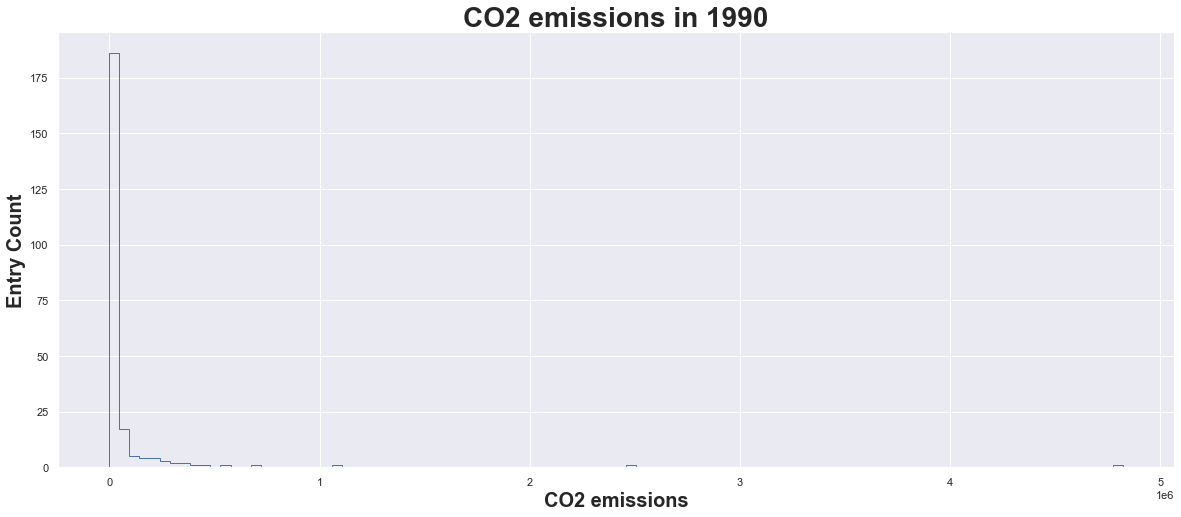

In [10]:
data_set = data['1990'].loc[data['Series'].str.contains('CO')]
sns.set()
f, ax = plt.subplots(figsize=(20, 8))
_ = plt.hist(data_set, histtype = 'step', bins=100)
_ = plt.title('CO2 emissions in 1990',size=28, weight='bold')
_ = plt.xlabel('CO2 emissions', size=20, weight='bold')
_ = plt.ylabel('Entry Count',size=20, weight='bold')
plt.show()

The graph is skewed to the left, and has a lot of negative values. My deduction was wrong.

Calculate standard deviation and standard error of the mean for CO2 emissions in 1990

In [11]:
std_CO2_1990 = data['1990'].loc[data['Series'].str.contains('CO')].std()
std_err_CO2_1990 = sem(data['1990'].loc[data['Series'].str.contains('CO')])
print(f"Standard Deviation: {std_CO2_1990}\nStandard Error: {std_err_CO2_1990}")

Standard Deviation: 371364.2235737665
Standard Error: 24487.031754232907


Both values tell us about variability, but the standard deviation tells us about the variability of one sample, whereas standard error tells us about the variability of multiple samples

Initializing the x axes and y axis for the line graphs

In [12]:
brazil_emissions = []
russia_emissions = []
china_emissions = []
india_emissions = []
usa_emissions = []
south_africa_emissions = []

for year in years:
        brazil_emissions.append(np.array(data[year].loc[(data['Series'].str.contains('CO2')) & (data['Country']=='Brazil')]).tolist()[0])
        russia_emissions.append(np.array(data[year].loc[(data['Series'].str.contains('CO2')) & (data['Country']=='Russian Federation')]).tolist()[0])
        china_emissions.append(np.array(data[year].loc[(data['Series'].str.contains('CO2')) & (data['Country']=='China')]).tolist()[0])
        india_emissions.append(np.array(data[year].loc[(data['Series'].str.contains('CO2')) & (data['Country']=='India')]).tolist()[0])
        usa_emissions.append(np.array(data[year].loc[(data['Series'].str.contains('CO2')) & (data['Country']=='United States')]).tolist()[0])
        south_africa_emissions.append(np.array(data[year].loc[(data['Series'].str.contains('CO2')) & (data['Country']=='South Africa')]).tolist()[0])

Line graph to show CO2 emissions in Brazil, Russia, China, India, the USA and South Africa over time

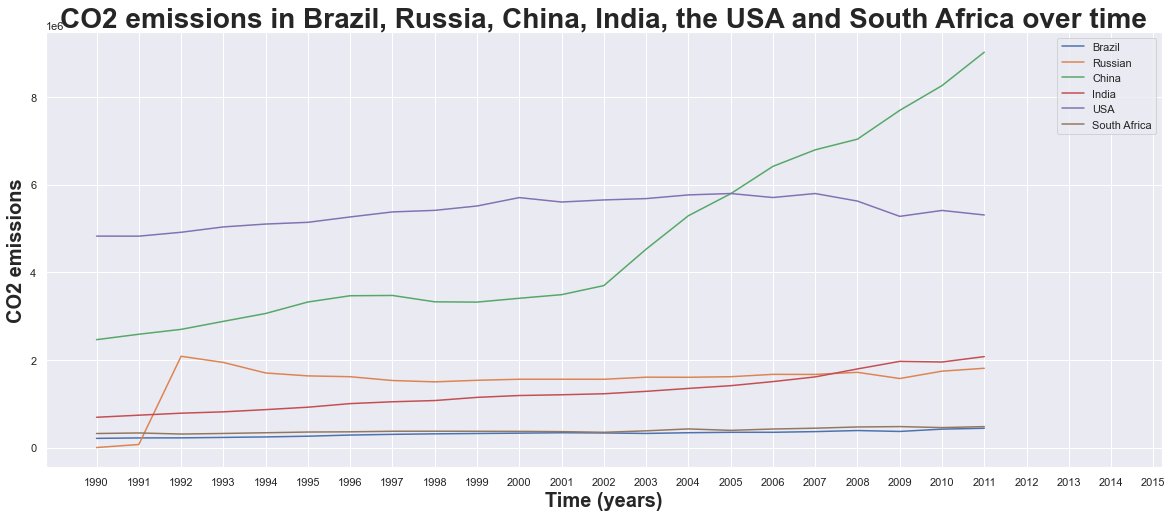

In [13]:
sns.set()
f, ax = plt.subplots(figsize=(20, 8))
_ = plt.plot(years, brazil_emissions, label='Brazil')
_ = plt.plot(years, russia_emissions, label = 'Russian')
_ = plt.plot(years, china_emissions, label = 'China')
_ = plt.plot(years, india_emissions, label = 'India')
_ = plt.plot(years, usa_emissions, label = 'USA')
_ = plt.plot(years, south_africa_emissions, label = 'South Africa')
_ = plt.title('CO2 emissions in Brazil, Russia, China, India, the USA and South Africa over time', size=28, weight='bold')
_ = plt.xlabel('Time (years)', size=20, weight='bold')
_ = plt.ylabel('CO2 emissions', size=20, weight='bold')
_ = ax.legend()
plt.show()

China and Brazil seem to take CO2 emissions more seriously than the other 4 countries, as South Africa and USA did not even seem to try much. Russia is the only country that had an early peak year, in 1992, as all the other countries had theirs in 2011, but Brazil in 2007. I think that Brazil and China have the best CO2 emissions practices.

Calculate mean and standard deviation for land area covered by forest in 1990

In [14]:
mean_land_area_1990 = data['1990'].loc[data['Series'].str.contains('land')].mean()
std_land_area_1990 = data['1990'].loc[data['Series'].str.contains('land')].std()
print(f"Mean: {mean_land_area_1990}")
print(f"Standard deviation: {std_land_area_1990}")

Mean: 384.3625579710145
Standard deviation: 4481.680274163339


The standard deviation for land area covered by forest in 1990's value indicates that the data is spread out in relation to the mean.

Plot histogram for land area covered by forest in 1990

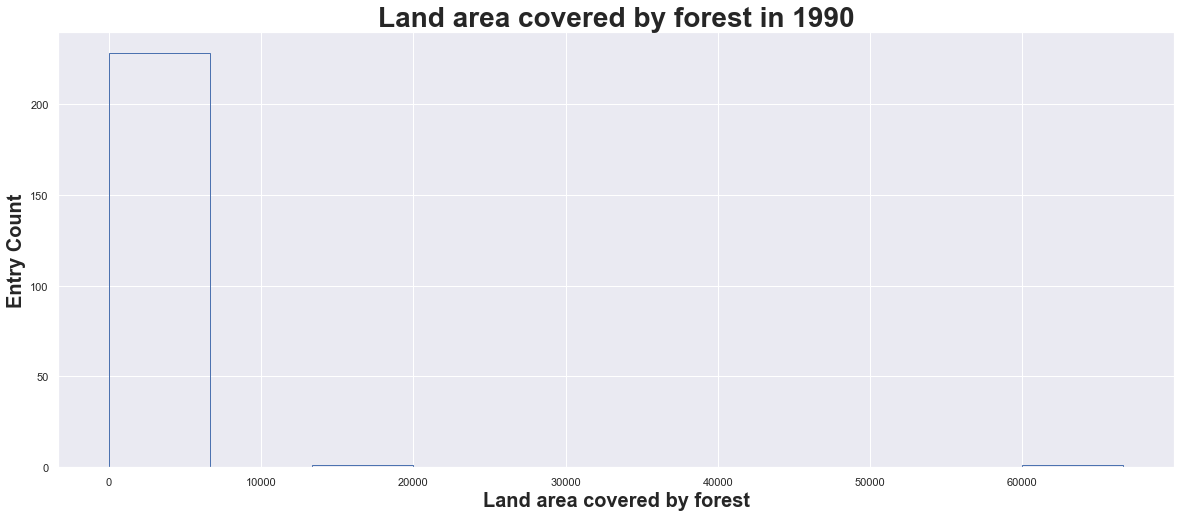

In [15]:
data_set = data['1990'].loc[data['Series'].str.contains('land')]
sns.set()
f, ax = plt.subplots(figsize=(20, 8))
_ = plt.hist(data_set, histtype = 'step')
_ = plt.title('Land area covered by forest in 1990',size=28, weight='bold')
_ = plt.xlabel('Land area covered by forest', size=20, weight='bold')
_ = plt.ylabel('Entry Count',size=20, weight='bold')
plt.show()

In the first graph, land area covered by forest in 1990, most of the entires, countries, are between 0 and 700-800. The rest of the entires are spread out between the 1000 and 2000 and 6000 to 7000 marks.

Plot histogram percentage of area protected in 1990

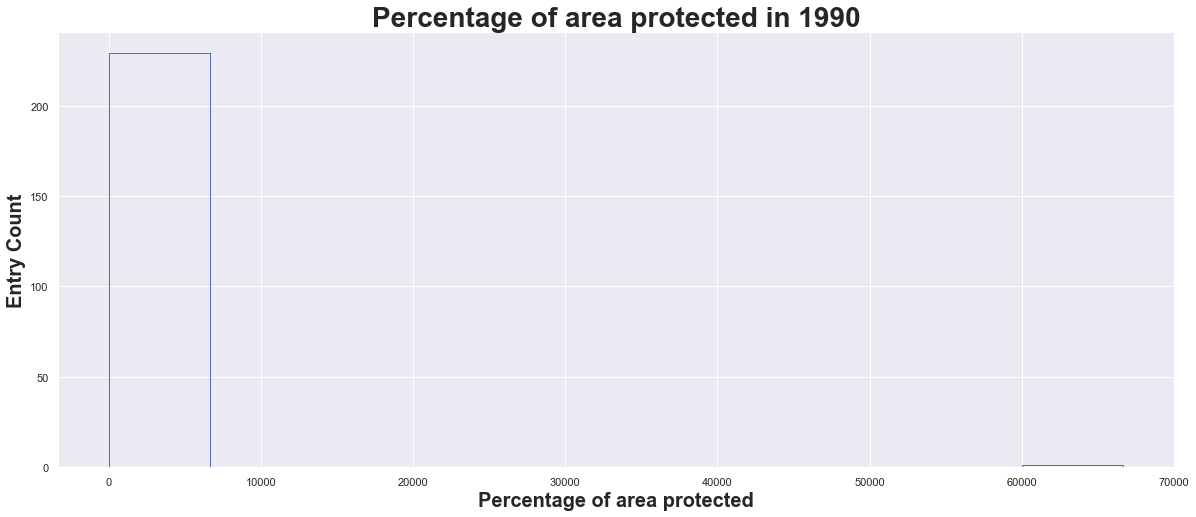

In [16]:
data_set = data['1990'].loc[data['Series'].str.contains('protected')]
sns.set()
f, ax = plt.subplots(figsize=(20, 8))
_ = plt.hist(data_set, histtype = 'step')
_ = plt.title('Percentage of area protected in 1990',size=28, weight='bold')
_ = plt.xlabel('Percentage of area protected',size=20, weight='bold')
_ = plt.ylabel('Entry Count',size=20, weight='bold')
plt.show()

In the second second graph, percentage of area protected in 1990, most of the data is spread out between the 0 to 700-800 marks and only a few between the 6000 - 7000 marks.

Plot scatterplot representing relationship between the proportion of land area covered by forest and the percentage of area protected in 2000

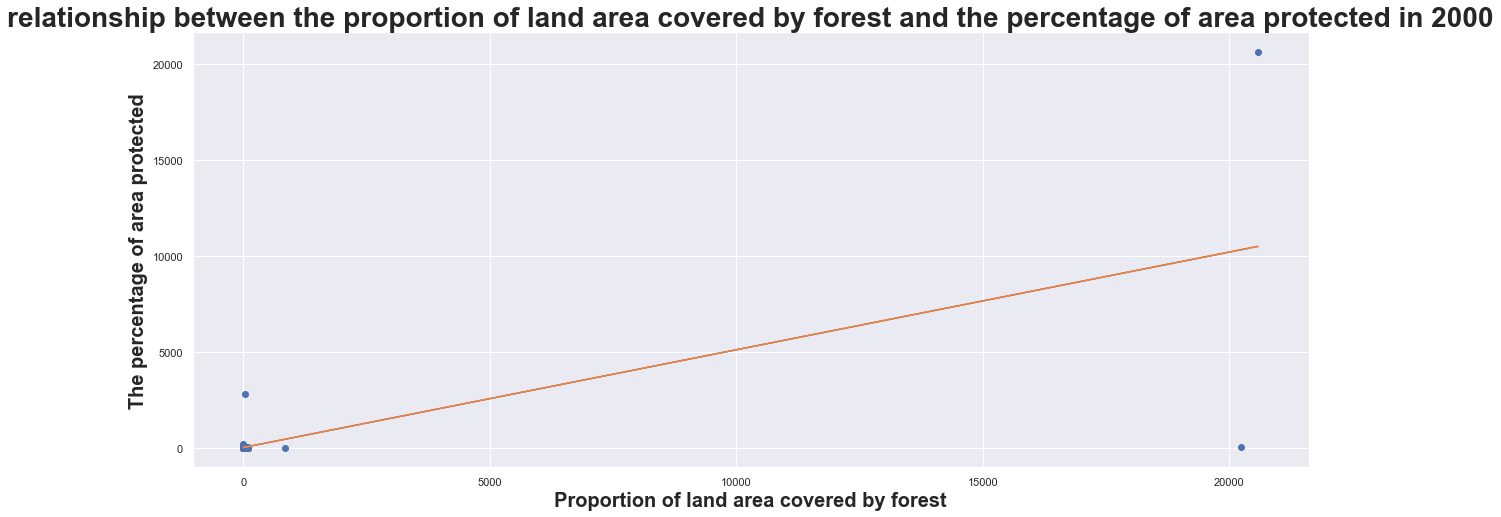

In [17]:
data_land_area = data['2000'].loc[data['Series'].str.contains('land')]
data_protected_area = data['2000'].loc[data['Series'].str.contains('protected')]

sns.set()
f, ax = plt.subplots(figsize=(20, 8))
_ = plt.plot(data_land_area, data_protected_area, 'o')
_ = plt.title("relationship between the proportion of land area covered by forest and the percentage of area protected in 2000", size=28, weight='bold')
_ = plt.xlabel("Proportion of land area covered by forest", size=20, weight='bold')
_ = plt.ylabel("The percentage of area protected", size=20, weight='bold')

x = np.array(data_land_area)
y = np.array(data_protected_area)
a, b = np.polyfit(x, y, 1)

_ = plt.plot(x, a*x+b)
plt.show()

The relationship represented by the graph is that of posivite correlation.

finding the values and countries of outliers

In [18]:
outlier_country_one_two = list(data['Country'].loc[(data['Series'].str.contains('land')) & (data['2000']>20000)])
outlier_country_three = data['Country'].loc[(data['Series'].str.contains('land')) & (data['2000']>500) & (data['2000']<1000)]
outlier_country_four = data['Country'].loc[(data['Series'].str.contains('protected')) & (data['2000']>2500) & (data['2000']<3000)]

In [19]:
outlier_one = data['2000'].loc[(data['Series'].str.contains('land')) & (data['Country']=='China, Hong Kong Special Administrative Region')]
outlier_two = data['2000'].loc[(data['Series'].str.contains('land')) & (data['Country']=='Serbia and Montenegro')]
outlier_three = data['2000'].loc[(data['Series'].str.contains('land')) & (data['Country']=='China, Macao Special Administrative Region')]
outlier_four = data['2000'].loc[(data['Series'].str.contains('protected')) & (data['Country']=='Sudan (former)')]

China, Hong Kong Special Administrative Region, China, Macao Special Administrative Region and Sudan(former) are the three outliers that do not follow the presented relationship between the variables. The first, China Hong Kong, has a high x-axis value but a low, precisely zero, y-axis value. 
The second, China Macao, has low x-axis value but the y-axis is zero. 
The third, Sudan (former), has a low y-axis value but the a-axis value is zero. 
The last outlier, Serbia and Montenegro, follows the trend but both its variable values are very high, deviating from the regression line.

Log transforming forested land area and protected area variables

In [20]:
dict_log_land = {}
dict_log_protected = {}
for year in years:
    dict_log_land[year] = np.log(data[year].loc[data['Series'].str.contains('land')])
    dict_log_protected[year] = np.log(data[year].loc[data['Series'].str.contains('protected')])
log_land = pd.DataFrame(dict_log_land)
log_protected = pd.DataFrame(dict_log_protected)

Plot histograms representing distrubiton of log transformed forested land area variable

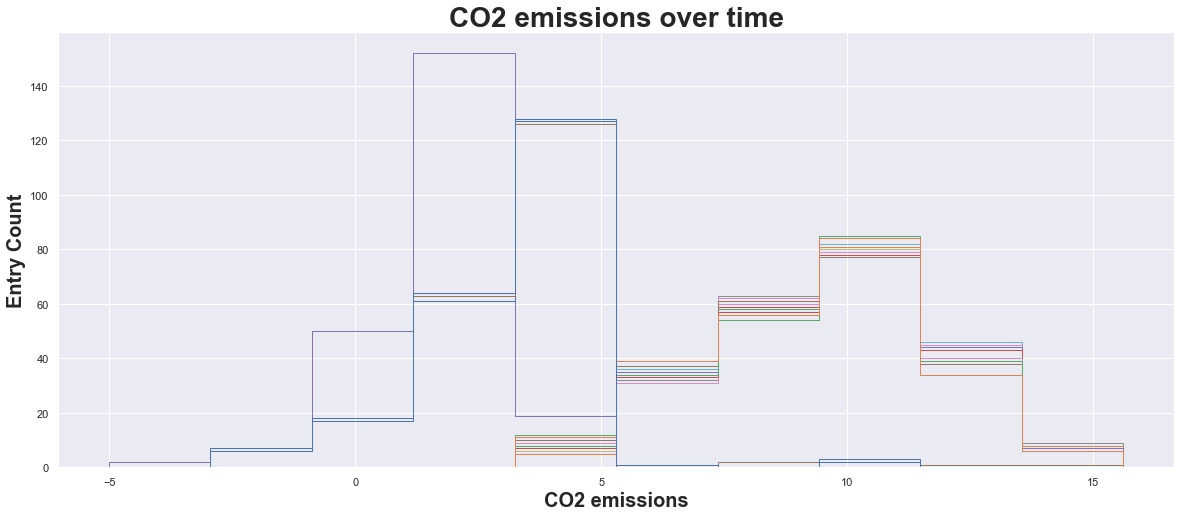

In [21]:
data_set = log_land
sns.set()
f, ax = plt.subplots(figsize=(20, 8))
_ = plt.hist(data_set[np.isfinite(data_set)], histtype = 'step')
_ = plt.title('CO2 emissions over time',size=28, weight='bold')
_ = plt.xlabel('CO2 emissions', size=20, weight='bold')
_ = plt.ylabel('Entry Count',size=20, weight='bold')
plt.show()

Plot histograms representing distrubiton of log transformed protected area variable

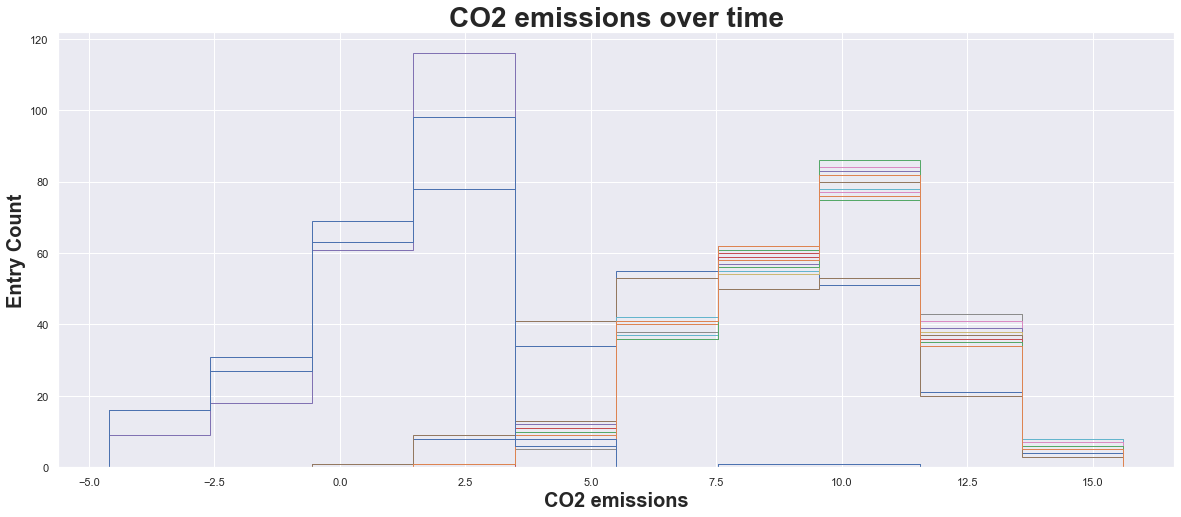

In [22]:
data_set = log_protected
sns.set()
f, ax = plt.subplots(figsize=(20, 8))
_ = plt.hist(data_set[np.isfinite(data_set)], histtype = 'step')
_ = plt.title('CO2 emissions over time',size=28, weight='bold')
_ = plt.xlabel('CO2 emissions', size=20, weight='bold')
_ = plt.ylabel('Entry Count',size=20, weight='bold')
plt.show()

Calculate Pearson correlation coefficient and its corresponding p value of the log variables of proportion of land area covered by forest and the percentage of area protected as measured in 1990

In [23]:
log_land.replace([np.inf, -np.inf], np.nan, inplace=True)
log_land.replace(np.nan, 0, inplace=True)
log_protected.replace([np.inf, -np.inf], np.nan, inplace=True)
log_protected.replace(np.nan, 0, inplace=True)

In [24]:
r, p_value = scipy.stats.pearsonr(log_land['1990'], log_protected['1990'])
print(f"R: {r}")
print(f"P value: {p_value}")

R: 0.26745680645289793
P value: 3.97046579536988e-05


The correlation coefficient, represents a positively correlated relationship between the two variables, although it is a weak relationship. The p-value, against a significance level of 0.05, or even 0.0005, proves to presents that the correlation is statically significant.

Calculate the Spearman Rank-Order Correlation Coefficient of the log variables of proportion of land area covered by forest and the percentage of area protected as measured in 1990

In [25]:
spearman_r, spearman_pvalue = scipy.stats.spearmanr(log_land['1990'], log_protected['1990'])
print(f"Spearman r: {spearman_r}")
print(f"Spearman P value: {spearman_pvalue}")

Spearman r: 0.10489269851895566
Spearman P value: 0.11262846703080631


Like the Pearson's r, the Spearman's r, is positively correlated but weak. The p_values are more different, the Spearman's p_value, is higher than the signficance level of 0.05 unlike the Pearson's p_value, making the correlation statistically insignificant.

# Conclusion

From the analysis done above, I have found that not many countries take carbon dioxide emissions seriously, and those that do take it seriously are very committed to keeping their numbers high. Most of the data of the 2010s was missing so not much deductions from the lack of data. It would also seem that the BRICS union may have discussed the implementations of CO2 emissions, as all 5 countries do participate, even better than most.